# Colorado Education Data
### Nancy, Daniel, Eunice

### Outline

Using 3 years of school grading data of Colorado Public Schools, we attemp to uncover relationship between various factors of public education system

## Part I : Data Exploration

Note : the data was supplied by Kaggle.com. Data was organized and was put into one file using R script Data_Cleaning.R.


### 1. Get Data

#### a. Load Type

In [1]:
import numpy as np
import sys

data_2010_type = np.loadtxt("./Data_2010_Type.csv", delimiter = ",", dtype="string")
data_2010_type

array(['"integer"', '"character"', '"character"', '"integer"',
       '"character"', '"character"', '"integer"', '"integer"', '"integer"',
       '"integer"', '"integer"', '"integer"', '"integer"', '"integer"',
       '"integer"', '"integer"', '"integer"', '"integer"', '"numeric"',
       '"integer"', '"integer"', '"integer"', '"integer"', '"integer"',
       '"integer"', '"integer"', '"integer"', '"numeric"', '"numeric"',
       '"numeric"', '"numeric"', '"numeric"', '"numeric"', '"numeric"',
       '"numeric"', '"numeric"'], 
      dtype='|S11')

#### b. Load Name

In [26]:
data_2010_name = np.loadtxt("./Data_2010_Names.csv", delimiter = ",", dtype="string")
data_2010_name

array(['"SchoolNumber"', '"EMH"', '"SchoolName"', '"DistrictNumber"',
       '"DistrictName"', '"EMHcombined"', '"AlternativeSchool"',
       '"SchoolGrade"', '"RankTotal"', '"OverallAchievedGrade"',
       '"ReadingAchievedGrade"', '"MathAchievedGrade"',
       '"WritingAchievedGrade"', '"ScienceAcheivedGrade"',
       '"OverallGrowthGrade"', '"ReadingGrowthGrade"', '"MathGrowthGrade"',
       '"WritingGrowthGrade"', '"GraduationRate"', '"ProficiencyTrend"',
       '"GrowthTrend"', '"OverallTrend"', '"ACTEnglish"', '"ACTMath"',
       '"ACTReading"', '"ACTScience"', '"TotalStudents"',
       '"PercentAmericanIndian"', '"PercentAsian"', '"PercentBlack"',
       '"PercentHispanic"', '"PercentWhite"', '"PercentPacificIslander"',
       '"PercentTwoOrMoreRace"', '"PercentFreeOrReducedLunch"',
       '"RemediationRate"'], 
      dtype='|S27')

#### c. Load Data

In [27]:
#data_2010 = np.genfromtxt('./Data_2010.csv', delimiter=',', dtype=data_types)
data_2010_raw = np.loadtxt("./Data_2010.csv",  delimiter=',', dtype=str)
#data_2010_raw = np.genfromtxt("./Data_2010.csv", dtype = "i4,|S10", usecols=(0,1), delimiter=',')
print data_2010_raw.shape
data_2010_raw
num_records = data_2010_raw.shape[0]
num_features = data_2010_raw.shape[1]
data_2010_raw[0:2,0:num_features]
        

(2082, 36)


array([['10', '"H"', '"ABRAHAM LINCOLN HIGH SCHOOL"', '880',
        '"DENVER COUNTY 1"', '""', '0', '5', '285', '3', '3', '5', '3',
        '2', '7', '7', '6', '7', '65.9', '3', '2', '1', '0', '0', '0', '0',
        '1930', '0.9326425', '2.9015544', '0.984456', '91.6580311',
        '3.1606218', '0.0518135', '0.3108808', '93', '0.785714'],
       ['11', '"E"', '"ACADEMY CHARTER SCHOOL"', '900',
        '"DOUGLAS COUNTY RE 1"', '""', '0', '12', '102', '10', '9', '12',
        '9', '9', '12', '12', '12', '6', 'NA', '3', '2', '2', 'NA', 'NA',
        'NA', 'NA', '700', '0.2857143', '2.1428571', '0.2857143',
        '10.4285714', '83.5714286', '0', '3.2857143', '8', 'NA']], 
      dtype='|S52')

Convert data to all-numeric

In [28]:
data_2010 = np.zeros((num_records,num_features))

for j in range(num_features-1):
    type = data_2010_type[j].lstrip('"').rstrip('"')
    if type =='numeric':
        for i in range(num_records) : 
            val = data_2010_raw[i][j].lstrip("'").rstrip("'")
            if(val != 'NA') : 
                data_2010[i,j] = float(val)
            else : 
                data_2010[i,j] = -1
    elif type == 'integer':
        for i in range(num_records) : 
            val = data_2010_raw[i][j].lstrip("'").rstrip("'")
            if(val != 'NA') : 
                data_2010[i,j] = int(val)
            else : 
                data_2010[i,j] = -1
    else : 
        string_to_num = {}
        dummy = 0
        for i in range(num_records) : 
            key =data_2010_raw[i][j].lstrip("'").rstrip("'") 
            if(key == 'NA' or key.isspace) : 
                data_2010[i,j] = -1
            elif key in string_to_num.keys():
                data_2010[i,j] = string_to_num[key]
            else :
                string_to_num[key] = dummy
                data_2010[i,j] = dummy
                dummy += 1
                
print data_2010.shape
data_2010[0,:]

(2082, 36)


array([  1.00000000e+01,  -1.00000000e+00,  -1.00000000e+00,
         8.80000000e+02,  -1.00000000e+00,  -1.00000000e+00,
         0.00000000e+00,   5.00000000e+00,   2.85000000e+02,
         3.00000000e+00,   3.00000000e+00,   5.00000000e+00,
         3.00000000e+00,   2.00000000e+00,   7.00000000e+00,
         7.00000000e+00,   6.00000000e+00,   7.00000000e+00,
         6.59000000e+01,   3.00000000e+00,   2.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.93000000e+03,
         9.32642500e-01,   2.90155440e+00,   9.84456000e-01,
         9.16580311e+01,   3.16062180e+00,   5.18135000e-02,
         3.10880800e-01,   9.30000000e+01,   0.00000000e+00])

##### One can access the actual string values from : data_2010_raw
##### One can access all-numeric version (each unique string gets a different number assigned) from : data_2010
Note that all NA vals are indicated as -1

In [29]:
print data_2010_raw[0:10,1]
print data_2010[0:10,1]
print data_2010_raw[0:10,5]
print data_2010[0:10,5]

['"H"' '"E"' '"M"' '"E"' '"E"' '"E"' '"H"' '"M"' '"E"' '"E"']
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
['""' '""' '""' '""' '""' '""' '""' '""' '""' '""']
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


#### d. Load CodeBook

In [30]:
data_2010_codebook = np.loadtxt("./Data_2010_CodeBook.csv", delimiter = ",", dtype="string",skiprows=1)
data_2010_codebook

array([['SchoolNumber', 'Integer of School (Unique)'],
       ['EMH', 'E(Elementary) M(Middle) H(High)'],
       ['SchoolName', 'String of School Name'],
       ['DistrictNumber', 'Integer of District'],
       ['DistrictName', 'String of District Name'],
       ['EMHcombined',
        'EM / MH/ EMH (Combination of E/M/H to show which grades this school has or empty if only one school)'],
       ['AlternativeSchool', '1 - 2 (1 : Yes / 2 : No)'],
       ['SchoolGrade', '1 - 13 (13 being A+  1 being F)'],
       ['RankTotal', 'Total ranking out of all schools'],
       ['OverallAchievedGrade', '1 - 13 (13 being A+  1 being F)'],
       ['ReadingAchievedGrade', '1 - 13 (13 being A+  1 being F)'],
       ['MathAchievedGrade', '1 - 13 (13 being A+  1 being F)'],
       ['WritingAchievedGrade', '1 - 13 (13 being A+  1 being F)'],
       ['ScienceAcheivedGrade', '1 - 13 (13 being A+  1 being F)'],
       ['OverallGrowthGrade', '1 - 13 (13 being A+  1 being F)'],
       ['ReadingGrowthGrade', 

One can access the codebook as following : 

In [31]:
print "Name : " + data_2010_codebook[2][0] + " / Content :  " + data_2010_codebook[2][1]

Name : SchoolName / Content :  String of School Name


### 2. Explore Data


NOTE : WATCH OUT WHEN WE ARE EXPLORING DATA. Total grade was calculated using factors such as ACT, grade growth, and achievement grade...etc.  So there won't be much point looking at correlatoin between Total score and ACT_reading, for example. We should focus on correlation/relationship between the environmental factors such as location (district), FRL(free or reduced lunch price rate), race proportion with grade. 

# data_2010_codebook

In [32]:
data_2010_raw

array([['10', '"H"', '"ABRAHAM LINCOLN HIGH SCHOOL"', ..., '0.3108808',
        '93', '0.785714'],
       ['11', '"E"', '"ACADEMY CHARTER SCHOOL"', ..., '3.2857143', '8',
        'NA'],
       ['11', '"M"', '"ACADEMY CHARTER SCHOOL"', ..., '3.2857143', '8',
        'NA'],
       ..., 
       ['9999', '"E"', '"COLORADO SCHOOL FOR THE DEAF AND BLIND"', ...,
        'NA', 'NA', 'NA'],
       ['9999', '"H"', '"COLORADO SCHOOL FOR THE DEAF AND BLIND"', ...,
        'NA', 'NA', 'NA'],
       ['9999', '"M"', '"COLORADO SCHOOL FOR THE DEAF AND BLIND"', ...,
        'NA', 'NA', 'NA']], 
      dtype='|S52')

In [33]:
data_2010

array([[  1.00000000e+01,  -1.00000000e+00,  -1.00000000e+00, ...,
          3.10880800e-01,   9.30000000e+01,   0.00000000e+00],
       [  1.10000000e+01,  -1.00000000e+00,  -1.00000000e+00, ...,
          3.28571430e+00,   8.00000000e+00,   0.00000000e+00],
       [  1.10000000e+01,  -1.00000000e+00,  -1.00000000e+00, ...,
          3.28571430e+00,   8.00000000e+00,   0.00000000e+00],
       ..., 
       [  9.99900000e+03,  -1.00000000e+00,  -1.00000000e+00, ...,
         -1.00000000e+00,  -1.00000000e+00,   0.00000000e+00],
       [  9.99900000e+03,  -1.00000000e+00,  -1.00000000e+00, ...,
         -1.00000000e+00,  -1.00000000e+00,   0.00000000e+00],
       [  9.99900000e+03,  -1.00000000e+00,  -1.00000000e+00, ...,
         -1.00000000e+00,  -1.00000000e+00,   0.00000000e+00]])

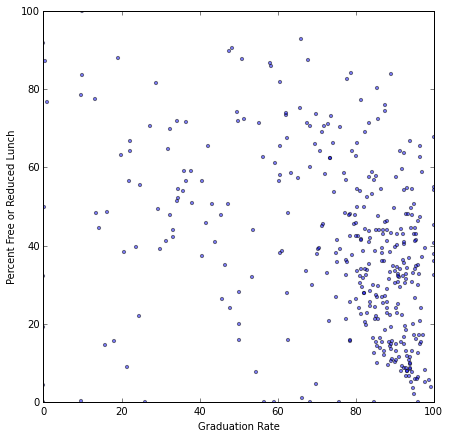

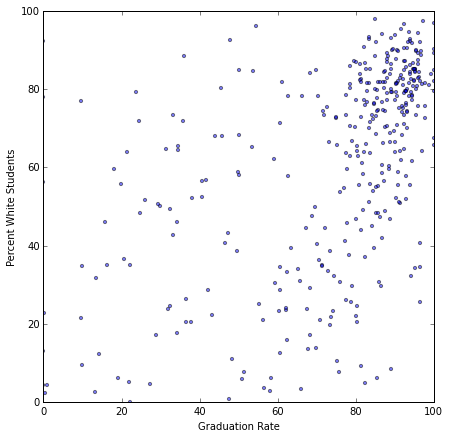

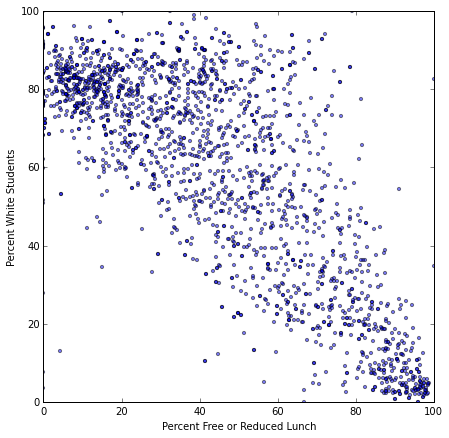

In [54]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.axis([0,100,0,100])
X = data_2010[:,18] #graduation rate, percent
Y = data_2010[:,34] #percent free or reduced lunch
plt.scatter(X,Y,alpha=0.5,s=10)
plt.xlabel("Graduation Rate")
plt.ylabel("Percent Free or Reduced Lunch")

plt.figure(figsize=(7,7))
plt.axis([0,100,0,100])
X = data_2010[:,18] #graduation rate, percent
Y = data_2010[:,31] #white students, percent
plt.scatter(X,Y,alpha=0.5,s=10)
plt.xlabel("Graduation Rate")
plt.ylabel("Percent White Students")

plt.figure(figsize=(7,7))
plt.axis([0,100,0,100])
X = data_2010[:,34] #percent free or reduced lunch
Y = data_2010[:,31] #white students, percent
plt.scatter(X,Y,alpha=0.5,s=10)
plt.xlabel("Percent Free or Reduced Lunch")
plt.ylabel("Percent White Students")

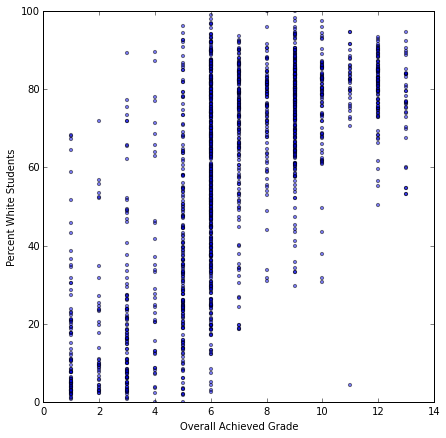

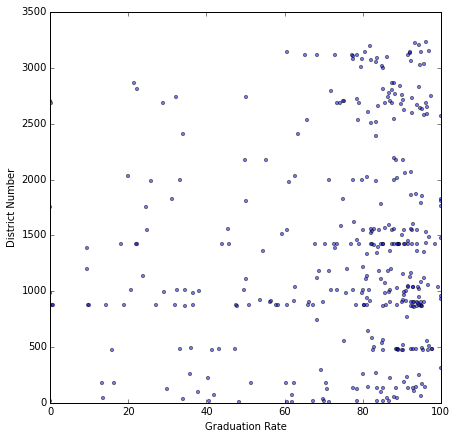

In [56]:
plt.figure(figsize=(7,7))
plt.axis([0,14,0,100])
X = data_2010[:,9] #overall achieved grade
Y = data_2010[:,31] #white students, percent
plt.scatter(X,Y,alpha=0.5,s=10)
plt.xlabel("Overall Achieved Grade")
plt.ylabel("Percent White Students")

plt.figure(figsize=(7,7))
plt.axis([0,100,0,3500])
X = data_2010[:,18] #graduation rate, percent
Y = data_2010[:,3] #district number
plt.scatter(X,Y,alpha=0.5,s=10)
plt.xlabel("Graduation Rate")
plt.ylabel("District Number")

In [2]:
growth_grades = data_2010[:,14] #growth grade

growth_trends = data_2010[:,21] #growth trend (what's the difference?)

#get remediation data from file
remediation_strings = np.loadtxt("./Data_2010.csv", dtype='str', delimiter=",", usecols = [35])
remediation_data = np.zeros((num_records,1))
growth_trend_color_map = np.zeros((num_records, 3)) #np.zeros_like((num_records,1), dtype=[0, 0, 0])

for i in range(num_records):
    if growth_trends[i] == 1:
        growth_trend_color_map[i][0] = 1
        growth_trend_color_map[i][1] = 1
        growth_trend_color_map[i][2] = 0
    elif growth_trends[i] == 2:
        growth_trend_color_map[i][0] = 1
        growth_trend_color_map[i][1] = 0
        growth_trend_color_map[i][2] = 0.8
    elif growth_trends[i] == 3: 
        growth_trend_color_map[i][0] = 1
        growth_trend_color_map[i][1] = 0
        growth_trend_color_map[i][2] = 0.5
    else : # gray
        growth_trend_color_map[i][0] = 0.2
        growth_trend_color_map[i][1] = 0.2
        growth_trend_color_map[i][2] = 0.2
    if(remediation_strings[i] == "NA"):
        remediation_data[i] = 0;
    else:
        remediation_data[i] = float(remediation_strings[i]) * 100

plt.figure(figsize=(7,7))
plt.axis([0,100,0,100])
X = data_2010[:,34] #percent free or reduced lunch
Y = remediation_data #percent needing remediation before graduation
plt.scatter(X,Y,alpha=0.5,c = growth_trend_color_map)
plt.title("Reduced Lunches and Remediation Rates")
plt.xlabel("Percent Free or Reduced Lunch")
plt.ylabel("Percent Remediation")


plt.figure(figsize=(7,7))
plt.axis([0,100,0,100])
X = data_2010[:,18] #graduation rate, percent
Y = remediation_data #percent needing remediation before graduation

plt.scatter(X,Y, alpha = 0.5, c = growth_trend_color_map)
plt.title("Remediation and Graduation Rates")
plt.xlabel("Percent Graduation")
plt.ylabel("Percent Remediation")


#not much correlation with the colors, but a cool exercise if we can find patterns with the colors

NameError: name 'data_2010' is not defined